# _k_-Means Clustering

Let's meet our first machine learning algorithm: k-means clustering. K-means has been used to identify subtypes of disease. For example, we discuss [this paper by Tothill et al.](http://www.ncbi.nlm.nih.gov/pubmed/18698038) in our k-means introduction video. Before you dive into the nuts and bolts of an implementation of k-means clustering, let's try to get an intuitive understanding of how this method works: https://youtu.be/qL7TBaMtooM





_Question: Is k-means clustering a supervised or unsupervised algorithm?_

### K-Means Demo Code:

In [1]:
%matplotlib inline
# crazy line lets us make figures in the notebook

import random
import sys
from math import sqrt

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def assign_nearest(centroids, point):
    """
    assigns the point to its nearest centroid
    
    params:
    centroids - a list of centroids, each of which has 2 dimensions
    point - a point, which has two dimensions
    
    returns:
    the index of the centroid the point is closest to.
    """
    nearest_idx = 0
    nearest_dist = sys.float_info.max  # largest float on your computer
    for i in range(len(centroids)):
        # sqrt((x1-x2)^2 + (y1-y2)^2)
        dist = sqrt((centroids[i][0]-point[0])**2 + (centroids[i][1]-point[1])**2)
        if dist < nearest_dist:  # smallest distance thus far
            nearest_idx = i
            nearest_dist = dist
    
    return nearest_idx

def kmeans(data, k):
    """
    performs k-means clustering for two-dimensional data.
    
    params:
    data - A numpy array of shape N, 2
    k - The number of clusters.
    
    returns:
    a dictionary with three elements
        - ['centroids']: a list of the final centroid positions.
        - ['members']: a list [one per centroid] of the points assigned to
          that centroid at the conclusion of clustering.
        - ['paths']: a list [one per centroid] of lists [one per iteration]
          containing the points occupied by each centroid.
    """
    
    # http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.ndarray.shape.html#numpy.ndarray.shape
    # .shape returns the size of the input numpy array in each dimension
    # if there are not 2 dimensions, we can't handle it here.
    if data.shape[1] != 2:
        return 'This implementation only supports two dimensional data.'
    if data.shape[0] < k:
        return 'This implementation requires at least as many points as clusters.'
    
    # pick random points as initial centroids
    centroids = []
    for x in random.sample(data, k):
        # note the use of tuples here
        centroids.append(tuple(x.tolist()))
        
    paths = []
    for i in range(k):
        paths.append([centroids[i],])
    
    # we'll store all previous states
    # so if we ever hit the same point again we know to stop
    previous_states = set()
    
    # continue until we repeat the same centroid positions
    assignments = None
    while not tuple(centroids) in previous_states:
        previous_states.add(tuple(centroids))
        assignments = []
        for point in data:
            assignments.append(assign_nearest(centroids, point))
        
        centroids_sum = [] # Make a list for each centroid to store position sum
        centroids_n = [] # Make a list for each centroid to store counts
        for i in range(k):
            centroids_sum.append((0,0))
            centroids_n.append(0)
            
        for i in range(len(assignments)):
            centroid = assignments[i]
            centroids_n[centroid] += 1  # found a new member of this centroid
            # add the point
            centroids_sum[centroid] = (centroids_sum[centroid][0] + data[i][0],
                                       centroids_sum[centroid][1] + data[i][1])
        
        for i in range(k):
            new_centroid = (centroids_sum[i][0]/centroids_n[i], centroids_sum[i][1]/centroids_n[i])
            centroids[i] = new_centroid
            paths[i].append(new_centroid)
        
    r_dict = {}
    r_dict['centroids'] = centroids
    r_dict['paths'] = paths
    r_dict['members'] = assignments
    return r_dict
    

In [3]:
"""
This cell is full of plotting code. It uses something called matplotlib
to show kmeans clustering. Specifically it shows the path centroids took,
where they ended up, and which points were assigned to them. Feel free
to take a look at this, but understanding it goes beyond the scope of the
class.
"""
def plot_km(km, points):
    """
    Plots the results of a kmeans run.
    
    params:
    km - a kmeans result object that contains centroids, paths, and members
    
    returns:
    a matplotlib figure object
    """
    
    (xmin, ymin) = np.amin(points, axis=0)
    (xmax, ymax) = np.amax(points, axis=0)
    

    plt.figure(1)
    plt.clf()
    plt.plot(points[:, 0], points[:, 1], 'k.', markersize=2)
    
    for path in km['paths']:
        nppath = np.asarray(path)
        plt.plot(nppath[:, 0], nppath[:, 1])

    # Plot the calculated centroids as a red X
    centroids = np.asarray(km['centroids'])
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='r', zorder=10)

    plt.title('K-means clustering of simulated data.\n'
              'estimated (red), path (lines)')
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xticks(())
    plt.yticks(())
    plt.yticks(())
    plt.show()

In [4]:
pop = np.loadtxt('kmeans-population.csv', delimiter=',')

In [12]:
km_result = kmeans(pop, 3)

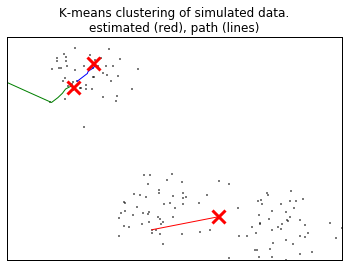

In [13]:
plot_km(km_result, pop)

_Question: What role have you selected for the in class exercise?_

## Homework

Run the k-means code enough times that you observe times where the centroids end up in the three groups of points and times where the clustering method fails to find the centers of the three groups. *Save an image from one of each (success as 'success.png' and failure as 'failure.png').* Upload both of these images to this folder (4 pts). Then answer the questions below:

_Q1: What conditions cause k-means to fail to find the appropriate centers? (3 pts)_

_Q2: How might you diagnose situations where this has occurred automatically? You don't need to write the code to do this - just provide a conceptual outline for a strategy that you might employ (3 pts)_

## Extra Information

The k-means implementation above is functional and could be used. A much more optimized implementation is available in the scikit learn package that we're going to use for the supervised machine learning applications in this course. For more information on using that implementation, check out the documentation: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html